In [4]:
import os
import pandas as pd
import csv

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

In [3]:
path = os.getcwd()+'/dataset'
files = os.listdir(path)
files

['wdbc.names', 'wdbc.data', 'breast-cancer-wisconsin.data']

In [5]:
os.chdir(path)


In [16]:
cancer_df = pd.read_csv('wdbc.data', header=None)

In [17]:
colnames = ['id','target','mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

cancer_df.columns = colnames

In [18]:
cancer_df

,id,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


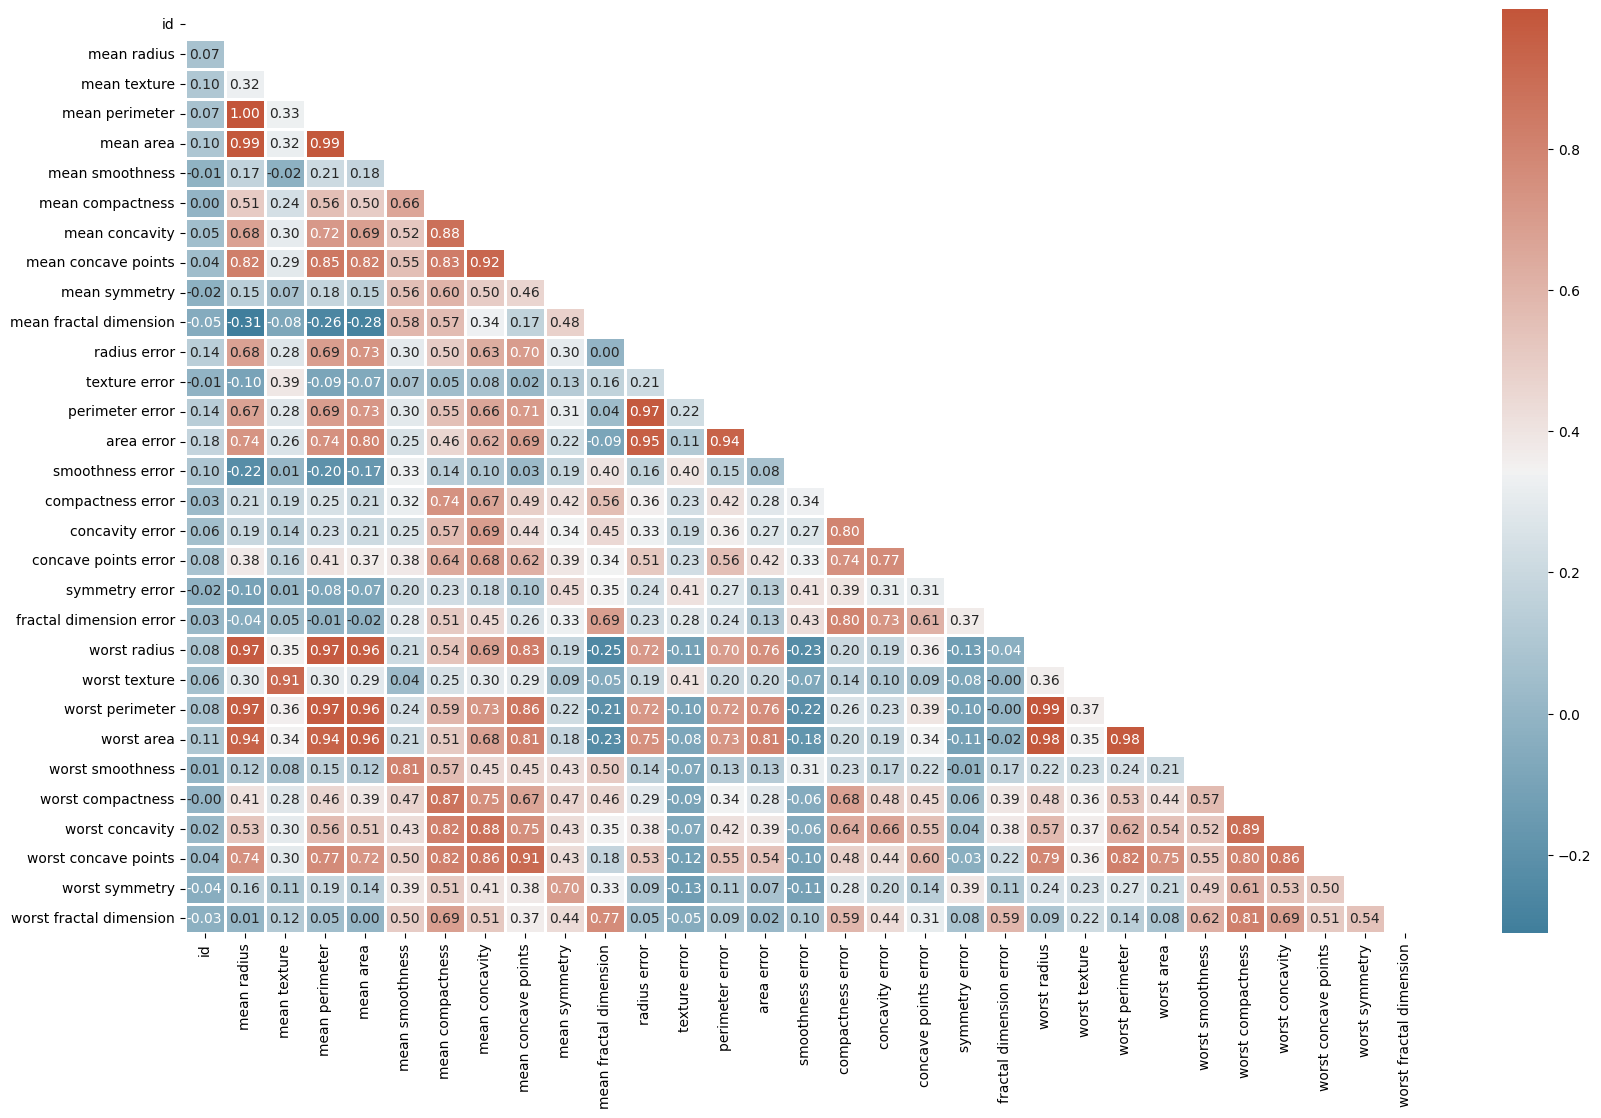

In [24]:
plt.figure(figsize = (20, 12))
corr = cancer_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

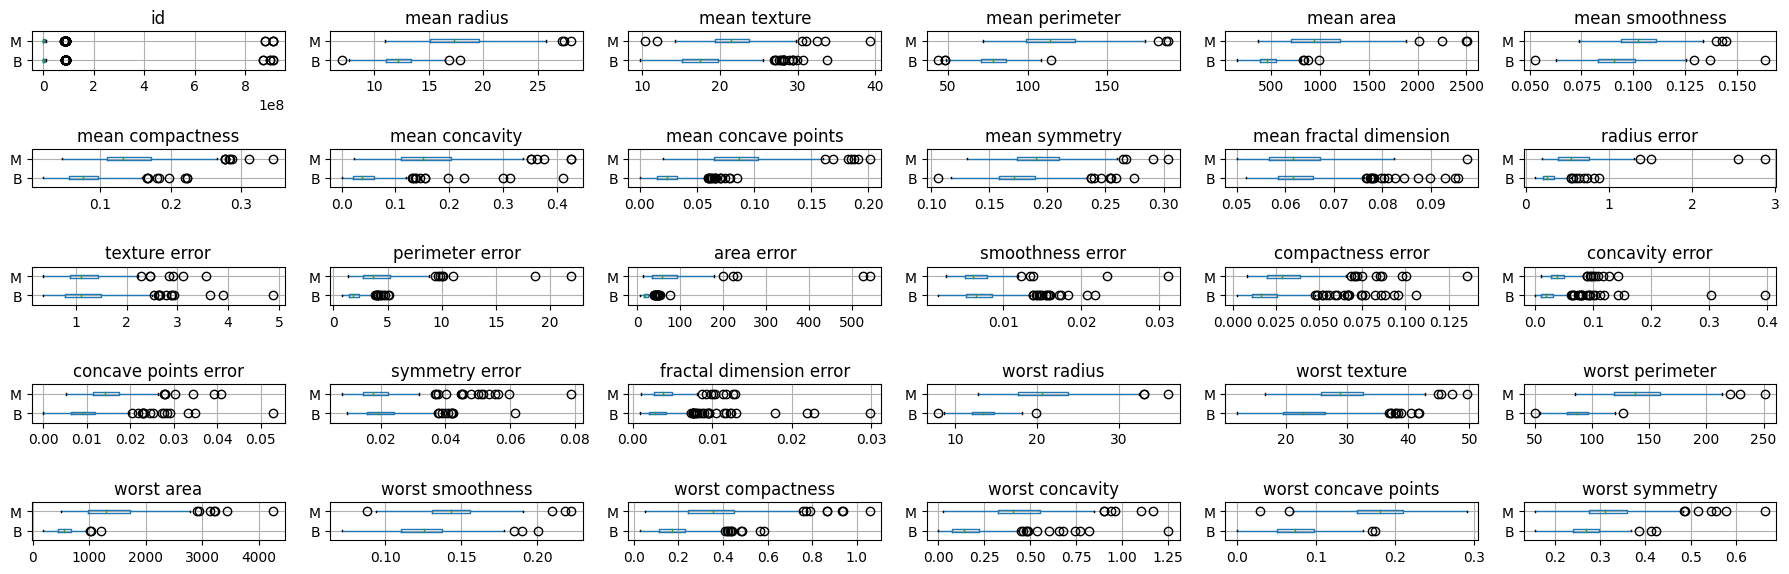

In [25]:
X = cancer_df.drop(columns = 'target')
fig, axes = plt.subplots(5, 6, figsize=(18, 6))
for c, ax in zip(X.columns, axes.ravel()):
    cancer_df[[c, 'target']].boxplot(vert=False, by='target', ax=ax)
    ax.set_xlabel("")
plt.suptitle("")
plt.tight_layout()

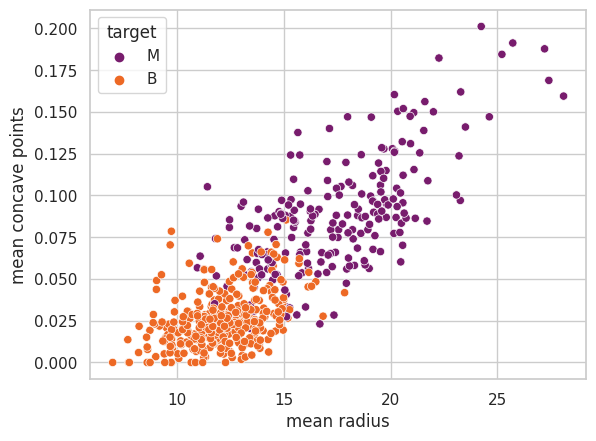

In [26]:
sns.set(style='whitegrid')
ax = sns.scatterplot(x="mean radius",
                    y="mean concave points",hue='target',
                    data=cancer_df, palette="inferno")

In [105]:
cancer_df[['mean radius','mean concave points']].describe()

,mean radius,mean concave points
count,569.000000,569.000000
mean,14.127292,0.048919
std,3.524049,0.038803
min,6.981000,0.000000
25%,11.700000,0.020310
50%,13.370000,0.033500
75%,15.780000,0.074000
max,28.110000,0.201200


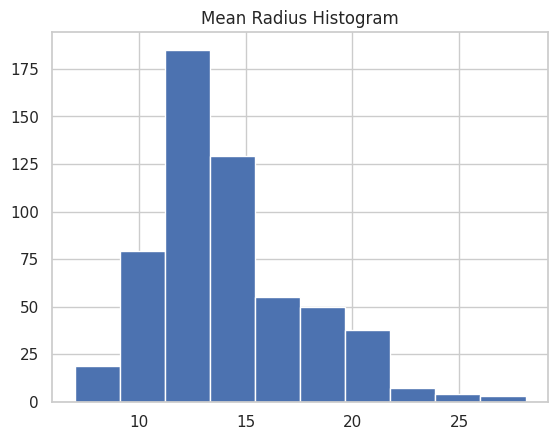

In [29]:
cancer_df['mean radius'].hist()
plt.title("Mean Radius Histogram")
plt.show()

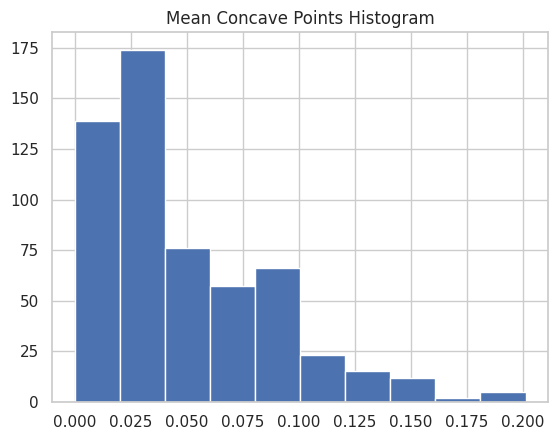

In [30]:
cancer_df['mean concave points'].hist()
plt.title("Mean Concave Points Histogram")
plt.show()

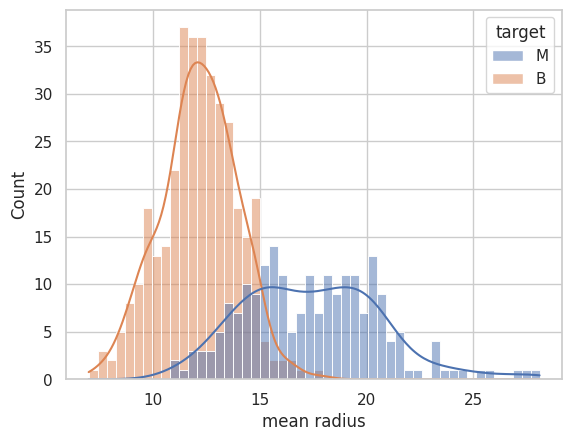

In [32]:
#plt.figure(figsize=(9,6))
ax = sns.histplot(x= "mean radius",
             data=cancer_df,
              bins=50,
              hue="target",
              kde=True)
#plt.savefig("Histograms_with_Multiple_Density_lines_Seaborn_histplot.jpg")


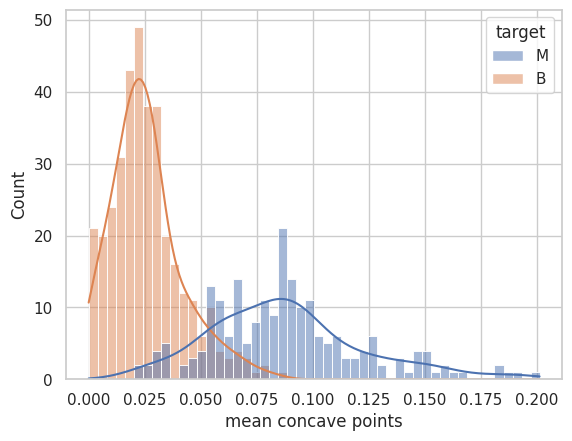

In [33]:
#plt.figure(figsize=(9,6))
ax = sns.histplot(x= "mean concave points",
             data=cancer_df,
              bins=50,
              hue="target",
              kde=True)
#plt.savefig("Histograms_with_Multiple_Density_lines_Seaborn_histplot.jpg")


In [34]:
pca = PCA(n_components=3)

In [36]:
df_features = df.drop(['target'], axis=1)

from sklearn.preprocessing import StandardScaler
standardized = StandardScaler()
standardized.fit(df_features)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_data = standardized.transform(df_features)

In [37]:
pca.fit(scaled_data)

PCA(n_components=3)

In [44]:
x_pca = pca.transform(scaled_data)
x_pca

array([[ 9.18319983,  1.97127137, -1.17162471],
       [ 2.38329766, -3.75345877, -0.58022866],
       [ 5.74247239, -1.08035048, -0.53308788],
       ...,
       [ 1.2518901 , -1.89397674,  0.53446685],
       [10.36503528,  1.69639755, -1.90741786],
       [-5.47826365, -0.67278804,  1.47716504]])

In [41]:
def diag(x): return 1 if x =='M' else 0
df_diag= df['target'].apply(diag)

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
x_pca[:1]

array([[ 9.18319983,  1.97127137, -1.17162471]])

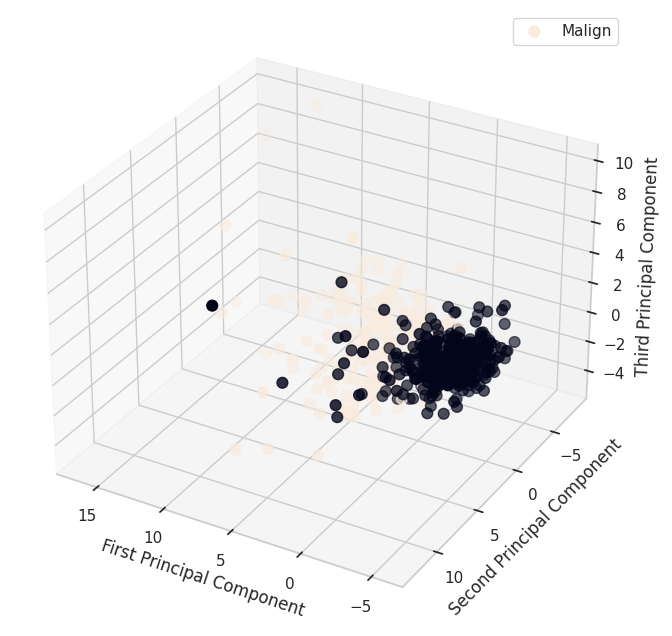

In [50]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df_diag, s=60)
ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

In [56]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,2],hue=cancer_df['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')

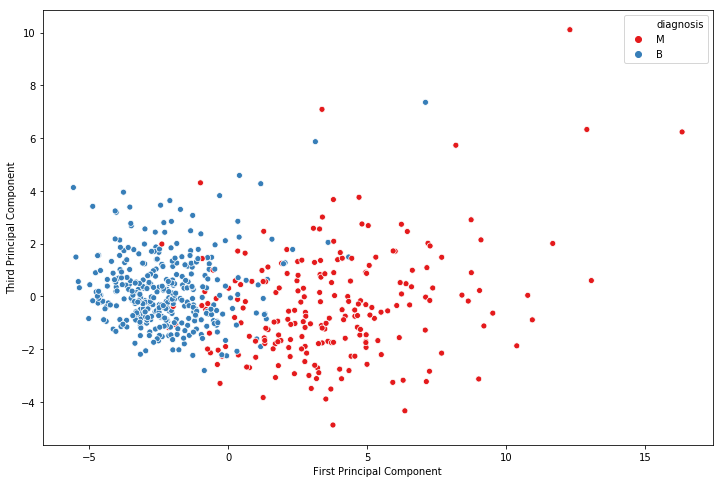

In [57]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,1], x_pca[:,2],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')

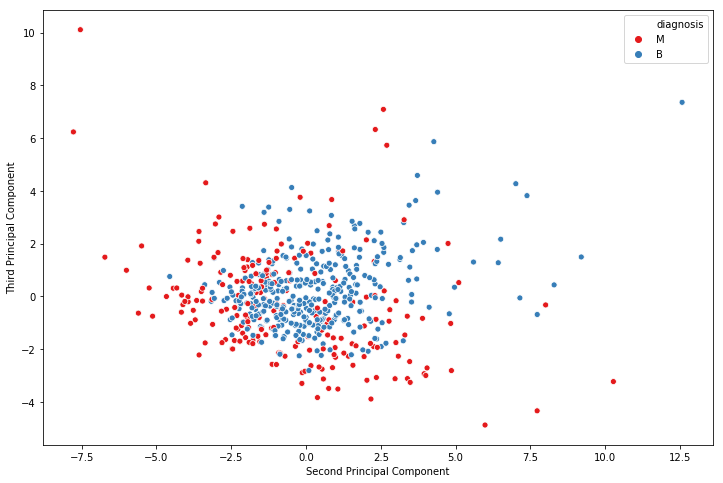

In [58]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

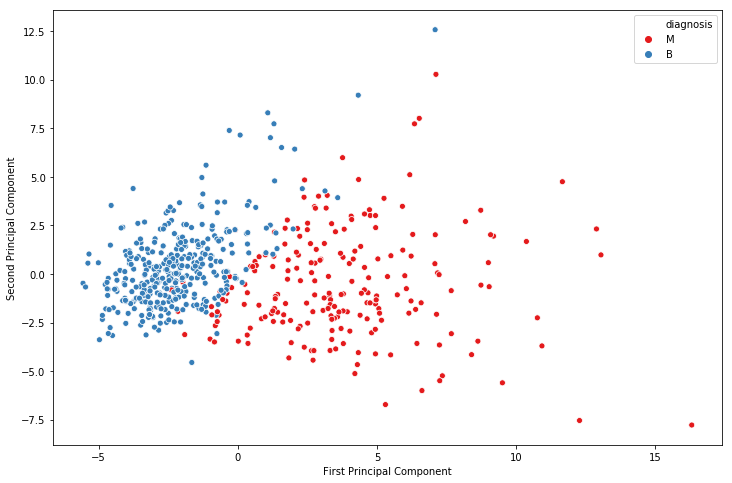

In [59]:
df_pc = pd.DataFrame(pca.components_, columns = df_features.columns)

In [60]:
df_pc

,id,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.022912,0.218913,0.103844,0.227535,0.221046,0.142415,0.239067,0.258280,0.260738,0.137978,...,0.228009,0.104515,0.236637,0.224932,0.127824,0.209885,0.228602,0.250746,0.122680,0.131560
1,-0.034068,-0.233271,-0.060044,-0.214589,-0.230669,0.186422,0.152455,0.060542,-0.034167,0.190685,...,-0.219296,-0.045501,-0.199296,-0.218985,0.172563,0.144254,0.098527,-0.007534,0.142619,0.275702
2,0.096938,-0.011394,0.066892,-0.012125,0.026293,-0.103182,-0.074769,0.001759,-0.027580,-0.040962,...,-0.049406,-0.039829,-0.050432,-0.013189,-0.255329,-0.234514,-0.172025,-0.170481,-0.270516,-0.229474


Text(153.75, 0.5, 'Principal Components')

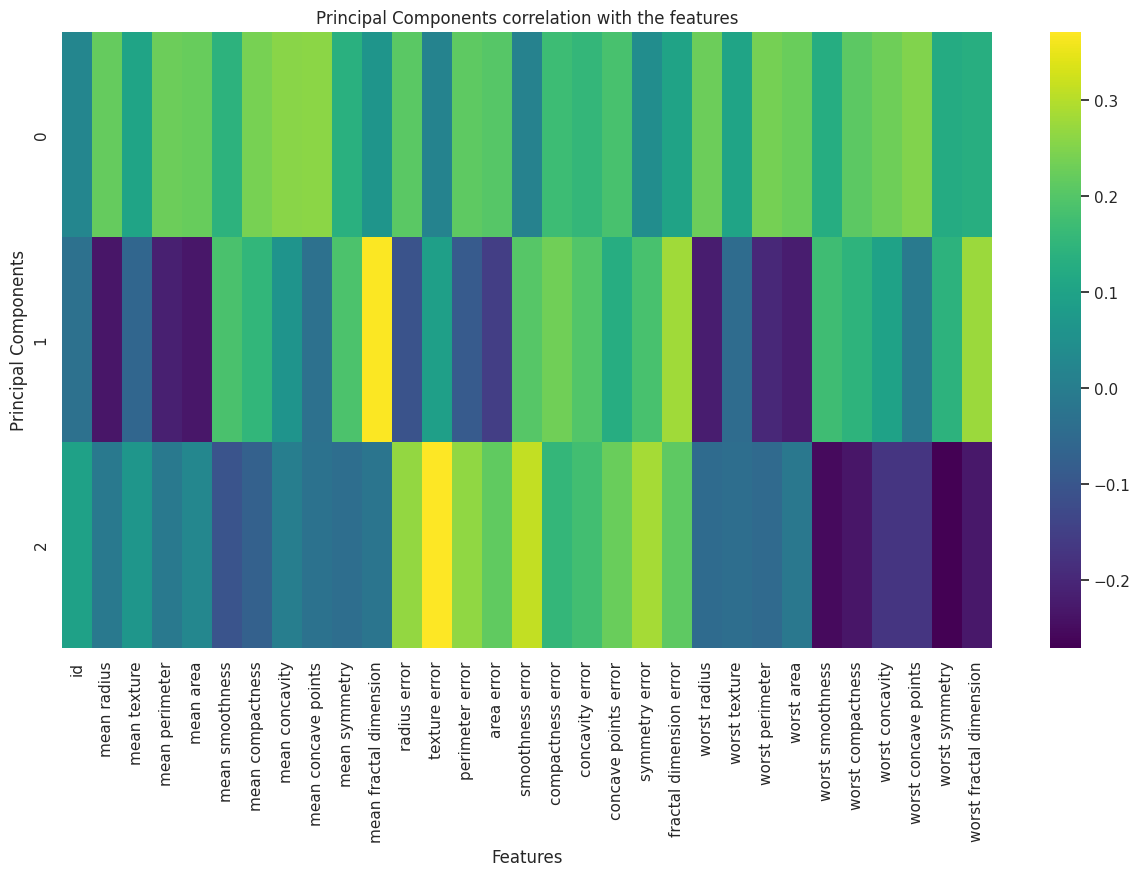

In [61]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

#### Covariance Matrix

In [64]:
## Label encoding since the algorithms we are going to use do not take non numerical or boolean data as inputs
cancer_df.target.replace({'M':0,'B':1},inplace=True)

In [65]:
cancer_df.head(30)

,id,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,843786,0,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,844359,0,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,84458202,0,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,844981,0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,84501001,0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [66]:
X_std = StandardScaler().fit_transform(cancer_df)

#### lables removed

In [67]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00176056 -0.03983852  0.07475785 ...  0.0352355  -0.04430211
  -0.02991822]
 [-0.03983852  1.00176056 -0.73131377 ... -0.79496314 -0.41702722
  -0.32444239]
 [ 0.07475785 -0.73131377  1.00176056 ...  0.74552443  0.16424199
   0.00707833]
 ...
 [ 0.0352355  -0.79496314  0.74552443 ...  1.00176056  0.50341323
   0.51201399]
 [-0.04430211 -0.41702722  0.16424199 ...  0.50341323  1.00176056
   0.53879512]
 [-0.02991822 -0.32444239  0.00707833 ...  0.51201399  0.53879512
   1.00176056]]


In [69]:
print('Numpy Covarience Matrix')
pd.DataFrame(np.cov(X_std.T))

Numpy Covarience Matrix


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.001761,-0.039839,0.074758,0.099946,0.073288,0.097063,-0.012991,0.000096,0.050168,0.044236,...,0.082550,0.064833,0.080127,0.107375,0.010356,-0.002973,0.023244,0.035236,-0.044302,-0.029918
1,-0.039839,1.001761,-0.731314,-0.415916,-0.743943,-0.710232,-0.359191,-0.597584,-0.697586,-0.777981,...,-0.777821,-0.457707,-0.784293,-0.735117,-0.422207,-0.592039,-0.660771,-0.794963,-0.417027,-0.324442
2,0.074758,-0.731314,1.001761,0.324352,0.999612,0.989095,0.170882,0.507015,0.677955,0.823977,...,0.971246,0.297531,0.966836,0.942739,0.119827,0.414191,0.527839,0.745524,0.164242,0.007078
3,0.099946,-0.415916,0.324352,1.001761,0.330113,0.321651,-0.023430,0.237119,0.302950,0.293981,...,0.353194,0.913650,0.358670,0.344151,0.077640,0.278319,0.301555,0.295836,0.105193,0.119415
4,0.073288,-0.743943,0.999612,0.330113,1.001761,0.988244,0.207643,0.557917,0.717396,0.852475,...,0.971183,0.303572,0.972095,0.943207,0.150814,0.456577,0.564872,0.772599,0.189448,0.051108
5,0.097063,-0.710232,0.989095,0.321651,0.988244,1.001761,0.177340,0.499379,0.687191,0.824718,...,0.964441,0.287995,0.960808,0.960902,0.123740,0.391098,0.513508,0.723288,0.143823,0.003744
6,-0.012991,-0.359191,0.170882,-0.023430,0.207643,0.177340,1.001761,0.660284,0.522903,0.554670,...,0.213495,0.036135,0.239273,0.207082,0.806742,0.473300,0.435691,0.503939,0.395004,0.500195
7,0.000096,-0.597584,0.507015,0.237119,0.557917,0.499379,0.660284,1.001761,0.884675,0.832598,...,0.536258,0.248570,0.591250,0.510501,0.566537,0.867333,0.817712,0.817009,0.511122,0.688593
8,0.050168,-0.697586,0.677955,0.302950,0.717396,0.687191,0.522903,0.884675,1.001761,0.923013,...,0.689448,0.300407,0.730849,0.677177,0.449612,0.756297,0.885659,0.862839,0.410185,0.515836
9,0.044236,-0.777981,0.823977,0.293981,0.852475,0.824718,0.554670,0.832598,0.923013,1.001761,...,0.831779,0.293267,0.857430,0.811055,0.453550,0.668629,0.753724,0.911758,0.376406,0.369310


In [70]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.20132922e-02  3.23675385e-02  9.79034765e-02 ...  8.90848848e-05
   7.50778692e-04 -3.94646593e-05]
 [ 2.16835592e-01 -7.70349679e-02  1.04562282e-01 ... -1.35318043e-03
  -5.64185167e-03  1.96326330e-03]
 [-2.16404027e-01  2.26045159e-01 -2.70960919e-04 ...  7.02498591e-01
   2.06906549e-01  2.12831390e-01]
 ...
 [-2.46161454e-01  1.78544102e-03 -1.62801516e-01 ... -2.33420367e-03
   3.46780933e-02  2.27716088e-02]
 [-1.20461432e-01 -1.42764783e-01 -2.71611002e-01 ...  2.99451106e-04
   1.28191676e-02  5.13414698e-03]
 [-1.26524229e-01 -2.76795104e-01 -2.29383010e-01 ...  1.68209443e-03
   1.04995787e-02 -2.31595480e-02]]

Eigenvalues 
[1.39485471e+01 5.74139697e+00 2.86996767e+00 2.00265173e+00
 1.66205541e+00 1.23687651e+00 9.80630223e-01 6.82374155e-01
 4.70552692e-01 4.04849585e-01 3.49782482e-01 3.04101049e-01
 2.91360351e-01 2.61463163e-01 2.11984813e-01 1.48816659e-01
 8.81995688e-02 7.99502813e-02 5.88861310e-02 5.15428583e-02
 4.80150195e-02 3.07250349e-02 

## selecting components that has 0.95 variablity

In [80]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs: print(i[0])

Eigenvalues in descending order:
13.948547070994909
5.741396969163095
2.8699676715022537
2.002651725050018
1.6620554058721828
1.2368765147290088
0.98063022300999
0.6823741552960474
0.4705526921746359
0.40484958491285505
0.3497824820808518
0.30410104933816773
0.2913603514331588
0.26146316310080264
0.2119848133756764
0.1488166591155788
0.08819956878542995
0.07995028129459743
0.05888613096569137
0.05154285825612395
0.04801501951429021
0.030725034859632815
0.02952249098428434
0.027380532530962693
0.024231114579994696
0.017565280895329365
0.015499317049253034
0.008064382555869238
0.006878890067363399
0.00013286098309279993
0.00074247123681197
0.0015912624610589846


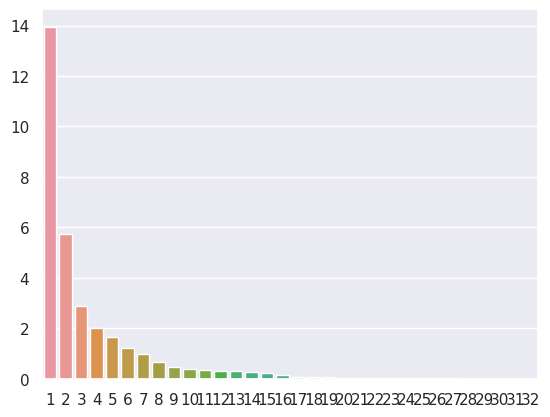

In [96]:
ax = sns.barplot(x=list(range(1,len(eig_pairs)+1)),y=[i[0] for i in eig_pairs])
#plt.xticks(rotation=45)

# selected components

In [109]:
threshold = 0.95
selected_components = list(filter(lambda x: x[0]>=threshold, eig_pairs))

In [110]:
selected_components

[(13.948547070994909,
  array([-0.02201329,  0.21683559, -0.21640403, -0.10370573, -0.22454145,
         -0.21800668, -0.13749109, -0.23131053, -0.25111541, -0.25516127,
         -0.13284549, -0.0577855 , -0.20102986, -0.01546228, -0.20574033,
         -0.19816935, -0.01137556, -0.1618341 , -0.14574961, -0.17626337,
         -0.03825491, -0.09502715, -0.22559681, -0.10505804, -0.23363556,
         -0.2220217 , -0.12518792, -0.20428815, -0.2229275 , -0.24616145,
         -0.12046143, -0.12652423])),
 (5.741396969163095,
  array([ 0.03236754, -0.07703497,  0.22604516,  0.05858664,  0.20712474,
          0.22289674, -0.18904243, -0.15896699, -0.06817531,  0.02670216,
         -0.19352523, -0.36758089,  0.09757655, -0.09077639,  0.08108218,
          0.14407057, -0.20414373, -0.23863145, -0.20284909, -0.13667082,
         -0.18572002, -0.28383027,  0.21240772,  0.04516373,  0.19209362,
          0.21159512, -0.17272925, -0.14826692, -0.10359117,  0.00178544,
         -0.14276478, -0.276795

In [92]:
print('Selected Components')
for component in selected_components:
    print(component[0])

Selected Components
13.948547070994909
5.741396969163095
2.8699676715022537
2.002651725050018
1.6620554058721828
1.2368765147290088
0.98063022300999


In [93]:
print("No of Components with 95% and above variability", len(selected_components))

No of Components with 95% and above variability 7


In [94]:
len(selected_components)

7

In [102]:
pca = PCA(n_components=8)
pca.fit_transform(cancer_df)
print(pca.explained_variance_ratio_)

[1.00000000e+00 2.80767974e-11 4.67287346e-13 4.38515079e-14
 3.49762899e-15 2.52779078e-15 1.92223783e-16 1.15891183e-16]


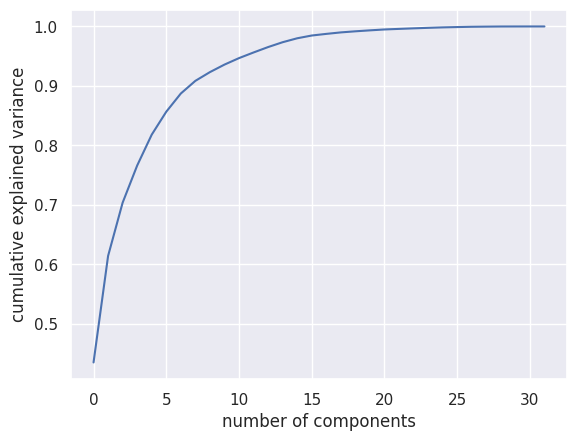

In [103]:
#Explained variance
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()